### Import `os` module and get the environment variables

In [1]:
import os

face_api_key = os.environ['face_api_key']

### Define the API url and image url

In [2]:
face_api_url = 'https://eastus.api.cognitive.microsoft.com/face/v1.0/detect'

image_url = \
  'https://raw.githubusercontent.com/PacktPublishing/Hands-On-Python-Deep-Learning-for-Web/master/Chapter8/sample_image.jpg'

### Consume the API and get the results

In [8]:
import requests

headers = { 'Ocp-Apim-Subscription-Key': face_api_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender',
}

response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})

# Get the response and log
faces = response.json()
print('There are {} faces in the given image'.format(str(len(faces))))

There are 2 faces in the given image


### Embed the information in the given image

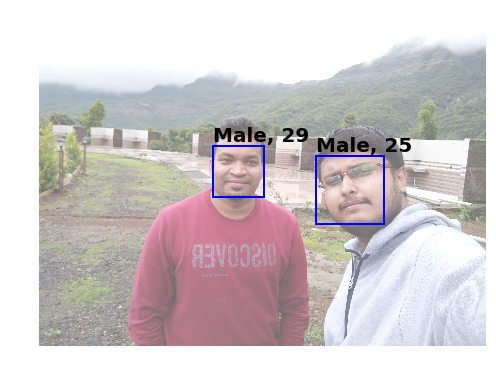

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

# Store the API response
response = requests.get(image_url)

# Create an image from the response content
image = Image.open(BytesIO(response.content))

# Create an empty figure
plt.figure(figsize=(8,8))

# Show the image created with the response
ax = plt.imshow(image, alpha=0.6)

# Iterate over the faces specified in the earlier section
for face in faces:
    
    # Embed the information
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")

# Turn off axis
_ = plt.axis("off")